# Problem Statement

In [1]:
# import warnings

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding

In [4]:
# load data
lead_score = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead_score.shape

(9240, 37)

In [7]:
# concise summary of the DataFrame's structure
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# getting the descriptive statistics of all the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# list of all the column names
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# check if any duplicates in our DataFrame
lead_score.duplicated().sum()

0

# Data Pre-processing

-  There are few categorical values that have 'select' as a level which indicates that a user might not have choosen any option from the dropdown menu and thus we can replace this with NaN.

In [11]:
# Handling the 'select' level present in few of the categorical variables
lead_score = lead_score.replace('Select' , np.nan)

In [12]:
# Checking for missing values
missing_value_percentage = round(lead_score.isnull().mean() * 100 ,2)

missing_value_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Filter the columns to drop those with missing values above 40%
columns_to_drop = missing_value_percentage[missing_value_percentage > 40].index

# view the columns to drop
columns_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
# dropping the columns having missing values > 40%
lead_score.drop(columns = columns_to_drop , inplace=True)

In [15]:
# check missing percentage again
round(lead_score.isnull().mean() *100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

-  There are still few columns with higher missing values, such as 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'; let us analysis them and understand the distribution of different values in these columns.

In [16]:
# Check the value counts for the 'Country' column
lead_score['Country'].value_counts(normalize = True) *100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

-  As we can see that majority of leads are from India, with 6492 entries and the counts for other countries are significantly lower, so we fill the missing values with 'India' and combine rest of the countries into a single category named "Others".

In [17]:
# Fill missing values in the 'Country' column with 'India'
lead_score['Country'].fillna('India', inplace=True)

In [18]:
# replace all countries except India with 'Others'
lead_score['Country'] = lead_score['Country'].apply(lambda x: 'India' if x == 'India' else 'Others')

In [19]:
# lets again check distribution
round(lead_score['Country'].value_counts(normalize = True) *100, 2)

Country
India     96.89
Others     3.11
Name: proportion, dtype: float64

-  Majority of leads or potential leads i.e. approximately 96.89%, are from India. The remaining countries contribute to only about 3.11%. This highly imbalanced distribution may not provide significant predictive value for our model thus we drop it.

In [20]:
# Drop the 'Country' column
lead_score.drop(columns=['Country'], inplace=True)

-  Inspect 'Specialiaztion' column

In [21]:
# Replace missing values in the 'Specialization' column with 'No Data'
lead_score['Specialization'].fillna('No Data', inplace=True)

In [22]:
lead_score['Specialization'].value_counts(normalize = True) *100

Specialization
No Data                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

-  Due to the large number of specialization fields and the presence of low data counts in many categories, it's beneficial to combine similar domains to improve data representation also this reduces the number of unique labels that will help during the creation of dummy variables.

In [23]:
# combining similar specialization
lead_score['Specialization'] = lead_score['Specialization'].replace(['Finance Management', 'Banking, Investment And Insurance', 'E-COMMERCE'], 'Finance and Banking')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Marketing Management', 'Retail Management', 'Media and Advertising'], 'Marketing and Sales')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Business Administration','International Business','E-Business','Rural and Agribusiness','IT Projects Management'], 'Business Administration and IT')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Operations Management','Supply Chain Management','Travel and Tourism','Services Excellence','Healthcare Management','Human Resource Management','Hospitality Management'], 'Operations and Others')

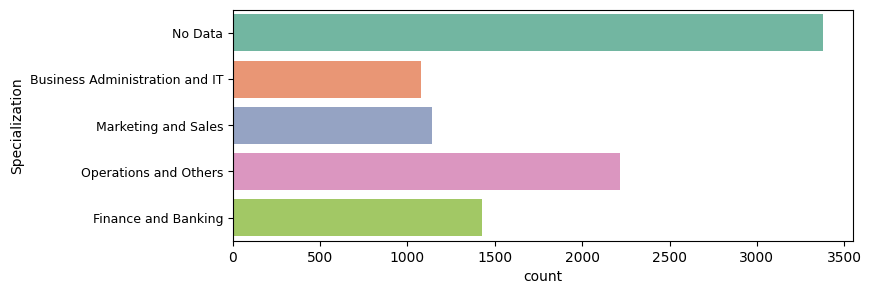

In [24]:
#lets visualize how skewed the data is
plt.figure(figsize= [8,3])
sns.countplot(lead_score['Specialization'], palette ="Set2")
plt.yticks(fontsize = 9)
plt.show()

In [25]:
# Check the value counts for the 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

-  Even after combining the less frequent labels into a single category, the distribution of the 'What is your current occupation' column will still remain imbalanced, with a significant majority of entries falling under the 'Unemployed' category. This imbalance could potentially affect the model's performance, especially if the majority class dominates., so we drop this column.

In [26]:
# Drop the 'What is your current occupation' column
lead_score.drop(columns=['What is your current occupation'], inplace=True)

### Data Cleaning

### Handling Outliers

# EDA

# Model Building

# Model Evaluation